# Sistem Klasifikasi Biner - NutriAI

Loading kaggle.json

In [2]:
from google.colab import files
import os
import shutil

# Membuat folder .kaggle jika belum ada
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Memindahkan kaggle.json ke ~/.kaggle
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Memberikan permission ke file tersebut
!chmod 600 ~/.kaggle/kaggle.json

Mengimport & menunzip dataset dari kaggle

In [3]:
# Download kaggle dataset and unzip the file
!kaggle datasets download -d nanditapore/healthcare-diabetes
!unzip healthcare-diabetes.zip

Dataset URL: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes
License(s): apache-2.0
  0% 0.00/26.7k [00:00<?, ?B/s]
100% 26.7k/26.7k [00:00<00:00, 124MB/s]
Archive:  healthcare-diabetes.zip
  inflating: Healthcare-Diabetes.csv  


# Data Understanding

## EDA

Fitur-fitur dataset dan deskripsinya :
- Id: Identifikasi unik untuk setiap entri data.
- Pregnancies: Jumlah kehamilan yang pernah dialami.
- Glucose: Konsentrasi glukosa plasma selama 2 jam dalam tes toleransi glukosa oral.
- BloodPressure: Tekanan darah diastolik (dalam mm Hg).
- SkinThickness: Ketebalan lipatan kulit triceps (dalam mm).
- Insulin: Kadar insulin serum setelah 2 jam (dalam mu U/ml).
- BMI: Indeks massa tubuh (berat badan dalam kg dibagi kuadrat tinggi badan dalam meter).
- DiabetesPedigreeFunction: Fungsi silsilah diabetes, yaitu skor genetik yang menunjukkan kemungkinan seseorang mengidap diabetes berdasarkan riwayat keluarga.
- Age: Usia dalam tahun.
- Outcome: Klasifikasi biner yang menunjukkan ada (1) atau tidak adanya (0) diabetes.

In [4]:
import pandas as pd
from IPython.display import display

# df = pd.read_csv('Healthcare-Diabetes.csv')
df = pd.read_csv('Healthcare-Diabetes.csv')

display(df.head())

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
# Menampikan statistik dataset
df.describe(include='all')

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
print("Missing values in total:")
print(df.isnull().sum())

Missing values in total:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Menampilkan data duplikat
duplicate_rows = df[df.duplicated()]
print("Jumlah duplikat:", duplicate_rows.shape[0])

Jumlah duplikat: 0


# Pre-processing Data

In [63]:
# Membuat rule label
df['Hipoglikemia'] = (df['Glucose'] < 70).astype(int)
df['Hiperglikemia'] = (df['Glucose'] > 140).astype(int)
df['Rendah_TekananDarah'] = (df['BloodPressure'] < 60).astype(int)
df['Obesitas'] = (df['BMI'] > 30).astype(int)
df['Underweight'] = (df['BMI'] < 18.5).astype(int)
df['Rendah_Insulin'] = (df['Insulin'] < 16).astype(int)

# Mendefinisikan fitur yang akan digunakan sebagai input model
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Mendefinisikan label (target) yang ingin diprediksi/modelkan
labels = ['Hipoglikemia', 'Hiperglikemia', 'Rendah_TekananDarah',
          'Obesitas', 'Underweight', 'Rendah_Insulin']

# Membentuk matriks X berisi nilai-nilai fitur
X = df[features].values

# Membentuk matriks y berisi nilai-nilai label
y = df[labels].values

Melakukan normalisasi fitur menggunakan StandardScaler dan membagi dataset menjadi data latih dan data uji dengan perbandingan 80:20 secara acak menggunakan train_test_split.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Modeling

Membuat target multi-label berdasarkan aturan kondisi kesehatan dari fitur seperti Glucose, BloodPressure, dan BMI, lalu mendefinisikan fitur input dan label target untuk model prediksi multi-label.

- Hipoglikemia: Glucose < 70
- Hiperglikemia: Glucose > 140
- Rendah_TekananDarah: BloodPressure < 60
- Obesitas: BMI > 30
- Underweight: BMI < 18.5
- Rendah_Insulin: Insulin < 16

membangun model Multi-Layer Perceptron (MLP) dengan beberapa lapisan Dense dan Dropout untuk klasifikasi multi-label, menggunakan aktivasi sigmoid pada output dan loss binary crossentropy untuk pelatihan.

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Membuat model neural network multilabel dengan layer dense dan dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(labels), activation='sigmoid')
])

# Mengkompilasi model dengan optimizer Adam dan loss binary crossentropy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model

In [57]:
# Training
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.2632 - loss: 0.5882 - val_accuracy: 0.3815 - val_loss: 0.3294
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3790 - loss: 0.3123 - val_accuracy: 0.4447 - val_loss: 0.2062
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4799 - loss: 0.2260 - val_accuracy: 0.5102 - val_loss: 0.1378
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5393 - loss: 0.1741 - val_accuracy: 0.5305 - val_loss: 0.1067
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5311 - loss: 0.1443 - val_accuracy: 0.5508 - val_loss: 0.0806
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5790 - loss: 0.1208 - val_accuracy: 0.5169 - val_loss: 0.0783
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5979 - loss: 0.1203 - val_accuracy: 0.5711 - val_loss: 0.0625
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5956 - loss: 0.1101 - val_accuracy: 0.5576 - val_loss

Visualisasi grafik loss selama pelatihan dan validasi model menggunakan matplotlib untuk memantau performa training dari waktu ke waktu.

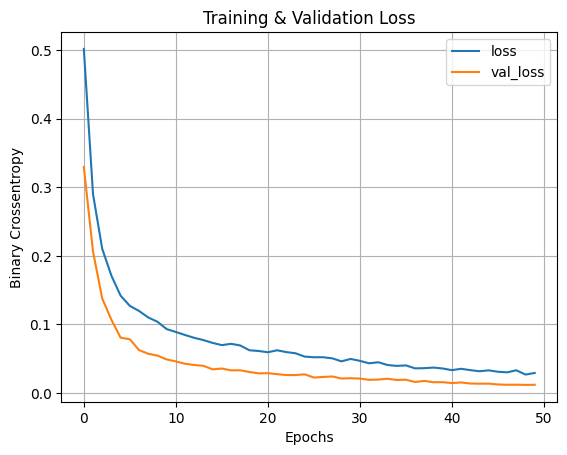

In [58]:
import matplotlib.pyplot as plt

# Menampilkan grafik loss selama training dan validasi untuk memantau performa model tiap epoch
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True)
plt.show()

Mengevaluasi model pada data uji dengan menghitung akurasi dan menampilkan classification report lengkap untuk setiap label multi-label setelah melakukan thresholding pada prediksi probabilitas.

In [81]:
from sklearn.metrics import classification_report
import numpy as np

# Membuat prediksi probabilitas dari model untuk data uji
y_pred = model.predict(X_test)

# Mengonversi probabilitas prediksi menjadi nilai biner dengan threshold 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Menampilkan laporan evaluasi klasifikasi untuk setiap label berdasarkan prediksi biner
print(classification_report(y_test, y_pred_binary, target_names=labels))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
                     precision    recall  f1-score   support

       Hipoglikemia       1.00      0.75      0.86        12
      Hiperglikemia       0.97      0.99      0.98       138
Rendah_TekananDarah       1.00      0.98      0.99        81
           Obesitas       0.99      1.00      0.99       339
        Underweight       1.00      0.89      0.94         9
     Rendah_Insulin       1.00      1.00      1.00       274

          micro avg       0.99      0.99      0.99       853
          macro avg       0.99      0.93      0.96       853
       weighted avg       0.99      0.99      0.99       853
        samples avg       0.89      0.89      0.89       853



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Inferensi Sederhana

Membuat fungsi untuk memberikan rekomendasi nutrisi dan kesehatan berdasarkan prediksi kondisi dengan threshold tertentu


In [82]:
def make_recommendation(prediction, threshold=0.5):
    labels = ['Hipoglikemia', 'Hiperglikemia', 'Rendah Tekanan Darah',
              'Obesitas', 'Underweight', 'Rendah Insulin']
    rekomendasi = []
    for i, val in enumerate(prediction):
        if val >= threshold:
            if labels[i] == 'Hipoglikemia':
                rekomendasi.append("Kadar gula darah rendah : Konsumsi makanan sumber karbohidrat kompleks.")
            elif labels[i] == 'Hiperglikemia':
                rekomendasi.append("Kadar gula darah tinggi : Kurangi konsumsi gula dan karbohidrat cepat serap.")
            elif labels[i] == 'Rendah Tekanan Darah':
                rekomendasi.append("Tekanan darah rendah : Tambahkan asupan cairan dan garam sesuai anjuran.")
            elif labels[i] == 'Obesitas':
                rekomendasi.append("Indikasi obesitas : Kurangi kalori harian dan tingkatkan aktivitas fisik.")
            elif labels[i] == 'Underweight':
                rekomendasi.append("Berat badan di bawah normal : Tambah asupan protein dan kalori sehat.")
            elif labels[i] == 'Rendah Insulin':
                rekomendasi.append("Kadar insulin rendah : Periksa lebih lanjut ke dokter untuk evaluasi metabolik.")
    return rekomendasi

Menerima data fitur, mengolahnya dengan scaler dan model untuk memprediksi kondisi kesehatan, lalu menampilkan status dan rekomendasi nutrisi berdasarkan hasil prediksi tersebut.

In [83]:
# Mendefinisikan nilai masing-masing fitur secara terpisah sesuai urutan fitur
pregnancies = 2
glucose = 165
blood_pressure = 55
skin_thickness = 20
insulin = 10
bmi = 10.0
diabetes_pedigree_function = 0.3
age = 45

# Membuat array sample dari variabel-variabel di atas
sample = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                    insulin, bmi, diabetes_pedigree_function, age]])

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)[0]

# Daftar label
labels = ['Hipoglikemia', 'Hiperglikemia', 'Rendah_TekananDarah',
          'Obesitas', 'Underweight', 'Rendah_Insulin']

# Print Results dengan menampilkan label beserta prediksi biner
print("\nStatus Prediksi (0 = normal, 1 = perlu perhatian):")
for label, status_prediksi in zip(labels, (pred >= 0.5).astype(int)):
    print(f"{label}: {status_prediksi}")

# Menampilkan rekomendasi nutrisi berdasarkan kondisi yang terdeteksi
print("\nRekomendasi Nutrisi Berdasarkan Kondisi:")
for r in make_recommendation(pred):
    print("-", r)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Status Prediksi (0 = normal, 1 = perlu perhatian):
Hipoglikemia: 0
Hiperglikemia: 1
Rendah_TekananDarah: 0
Obesitas: 0
Underweight: 1
Rendah_Insulin: 1

Rekomendasi Nutrisi Berdasarkan Kondisi:
- Kadar gula darah tinggi : Kurangi konsumsi gula dan karbohidrat cepat serap.
- Berat badan di bawah normal : Tambah asupan protein dan kalori sehat.
- Kadar insulin rendah : Periksa lebih lanjut ke dokter untuk evaluasi metabolik.
